# [1] Python for Statistics
# [1.3.3] Other Distributions and CLT Demonstration

**Prepared by:**

- Joshua Castillo
- Michael Adrian Javier
- Lanz Lagman
- Jeremiah Marimon

**Topics to cover:** 

- Other Distributions and CLT Demonstration
    - Binomial Distribution
    - Poisson Distribution
    - Exponential Distribution
    - CLT Demonstration


**Weekly Objectives:**

- Exploration of Various Distributions and some Demonstrations

**References:**
- [(Ivezic, Connolly, Vanderplas, Gray) Statistics, Data Mining, and Machine Learning in Astronomy](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
- [(Vanderplas) Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [(DataCamp) Introduction to Statistics](https://www.datacamp.com/courses/introduction-to-statistics)

## A. Binomial Distribution

$$ p(k|b,N) = \frac{N!}{k!(N-k)!}b^k(1-b)^{N-k}$$

Wherein

- $p(k|b,N)$: Binomial probability distribution as a function of $k$, and constants $b,N$
- $k$: Number of successful trials
- $b$: Number of unsuccessful trials i.e. failure
- $N$: total number of trials

**Observed from:**

- Probability of getting exactly n correct items in a 10 item multiple choice test thru sheer guessing
- **Probability of picking out a member from DSSoc that has a jowa**

In [ ]:
n_list = [20,20,40]
b_list = [0.2,0.6,0.6]
binom_x = np.arange(0,36)

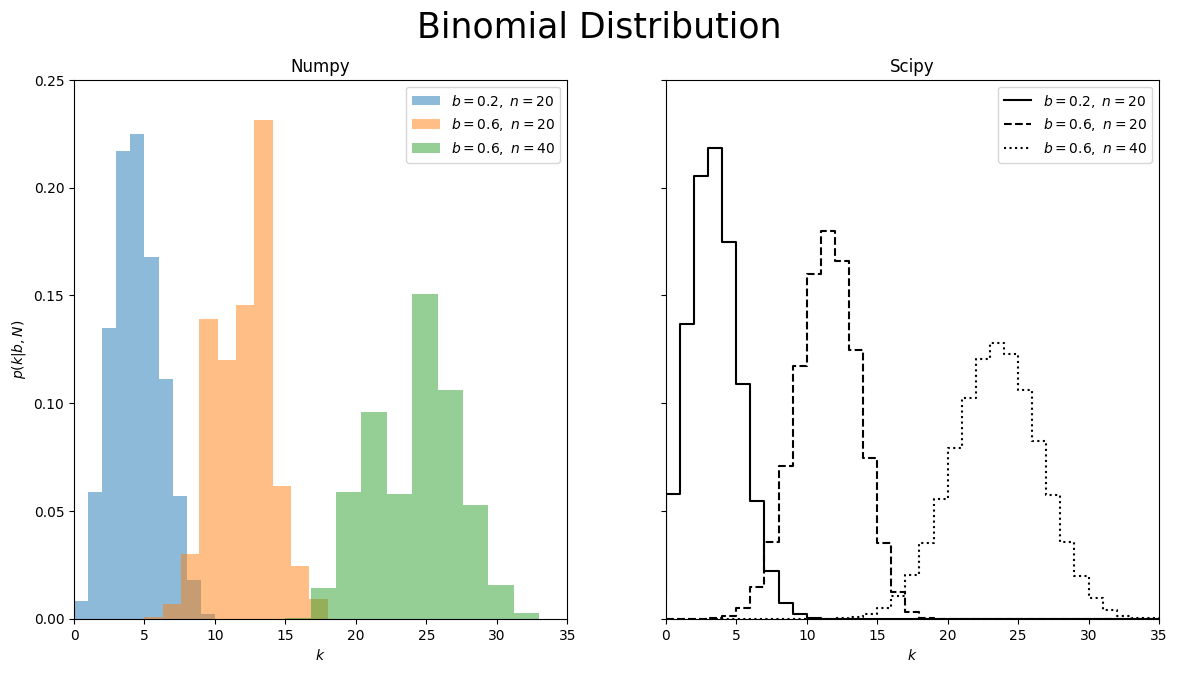

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7), sharex=True, sharey=True)
fig.suptitle("Binomial Distribution", fontsize=25)

for n, b, ls in zip(n_list, b_list, ls_list):
    np.random.seed(69)
    sample = np.random.binomial(n,b,1000)
    count, bins, ignored = ax[0].hist(sample, bins=10, alpha=0.5, 
                                   density=True, label=f'$b={b},\ n={n}$')
    
    ax[0].set(title="Numpy", 
           xlabel=r"$k$", ylabel=r"$p(k|b, N)$",
           xlim=(0,35), ylim=(0,0.25))
    ax[0].legend()
    
    
    dist = stats.binom(n, b)
    ax[1].step(binom_x, dist.pmf(binom_x), ls=ls, c='black',
             label=f'$b={b},\ n={n}$')
    
    ax[1].set(title="Scipy", 
           xlabel=r"$k$", 
           xlim=(0,35), ylim=(0,0.25))
    ax[1].legend()

## B. Poisson Distribution


$$ p(k|\mu) = \frac{\mu^k \exp(-\mu)}{k!} $$

Wherein

- $p(k|\mu)$: Poisson probability distribution as a function of $k$, and constant $\mu$
- $k$: number of successful trials
- $\mu$: mean

**Observed from:**

- Probability of getting struck by lightning given an average lifespan of approx. 80 years
- Probability of hearing an ambulance pass by every hour if you leave near PGH

In [ ]:
mu_list = [1,5,15]
poisson_x = np.arange(0,31)

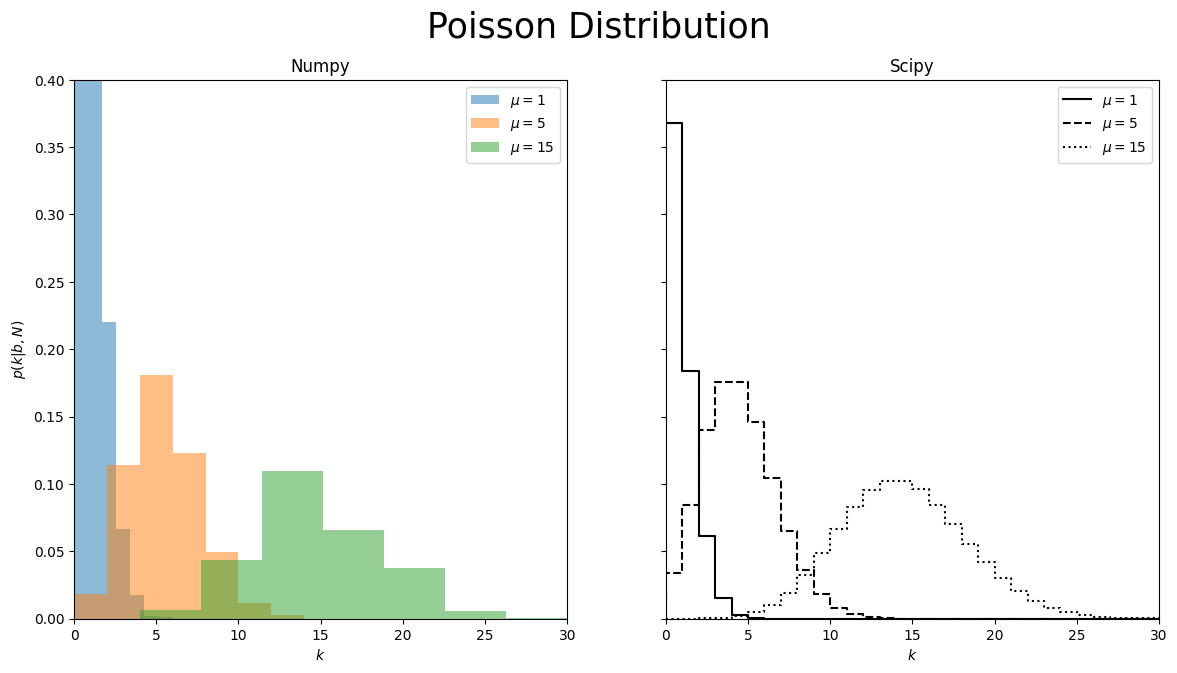

In [ ]:
np.random.seed(100)
fig, ax = plt.subplots(1,2, figsize=(14,7), sharex=True, sharey=True)
fig.suptitle("Poisson Distribution", fontsize=25)

for mu, ls in zip(mu_list, ls_list):
    np.random.seed(69)
    sample = np.random.poisson(mu, 1000)
    count, bins, ignored = ax[0].hist(sample, bins=7, alpha=0.5, 
                                   density=True, label=f'$\mu={mu}$')
    
    ax[0].set(title="Numpy", 
           xlabel=r"$k$", ylabel=r"$p(k|b, N)$",
           xlim=(0,35), ylim=(0,0.25))
    ax[0].legend()
    
    dist = stats.poisson(mu)
    ax[1].step(poisson_x, dist.pmf(poisson_x), ls=ls, c='black',
             label=f'$\mu={mu}$')
    
    ax[1].set(title="Scipy", 
           xlabel=r"$k$", 
           xlim=(0,30), ylim=(0,0.40))
    ax[1].legend()

## C. Exponential Distribution


$$ p(x|\lambda) = \lambda e^{-\lambda x}$$
$$ p(x|\beta) = \frac{1}{\beta} e^{-\frac{1}{\beta} x}$$

Wherein

- $p(x|\mu)$: Exponential probability distribution as a function of $x$, and constant $\lambda$
- $\mu$: mean
- $\lambda$: rate parameter
- $\beta$: scale parameter

**Observed from:**
- Probability of getting the next phone call in a call center
- Probability of the next earthquake happening from now


In [ ]:
beta_list = [1,5,10]
expon_x = np.arange(0,31)

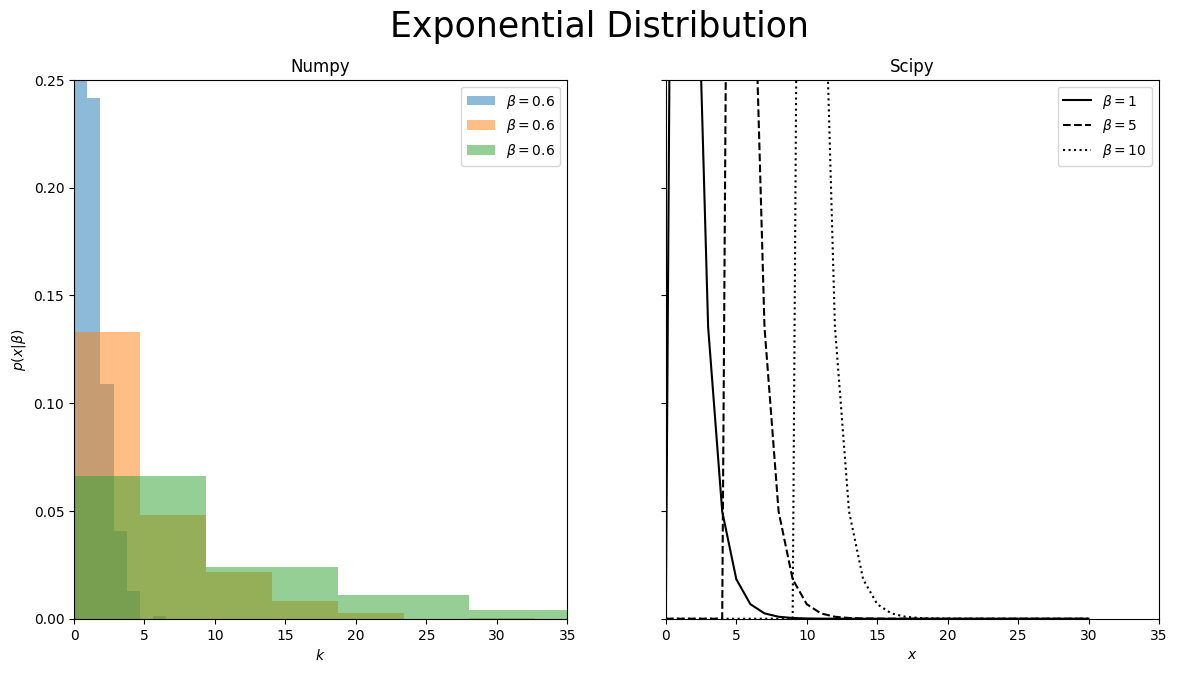

In [ ]:
np.random.seed(100)
fig, ax = plt.subplots(1,2, figsize=(14,7), sharex=True, sharey=True)
fig.suptitle("Exponential Distribution", fontsize=25)

for beta, ls in zip(beta_list, ls_list):
    np.random.seed(69)
    sample = np.random.exponential(beta, 1000)
    count, bins, ignored = ax[0].hist(sample, bins=7, alpha=0.5, 
                                      density=True, label=f'$\\beta={b}$',
                                     )
    
    ax[0].set(title="Numpy", 
           xlabel=r"$k$", ylabel=r"$p(x|\beta)$",
           xlim=(0,35), ylim=(0,0.25))
    ax[0].legend()
    
    dist = stats.expon(beta)
    ax[1].plot(expon_x, dist.pdf(expon_x), ls=ls, c='black', 
               label=f'$\\beta={beta}$',
              )
    
    ax[1].set(title="Scipy", 
           xlabel=r"$x$")
    ax[1].legend()

## D. CLT Demonstrations

### `CLT_Demonstrator`

In [ ]:
def CLT_Demonstrator(pop_size, pop_dist, sample_list, dist_title=None):
    """
    A crude function for visualizing CLT from a given distribution array an a list of sample numbers to consider.
    
    Parameters:
    
    pop_size: The size of the population. This should be the length of pop_dist,
    pop_dist: The 1D array containing the distribution.
    sample_list: The list of integers to be considered as sample sizes.
    dist_title: The name of the distribution visualized.
    """
    pop_size = 1000000

    fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)
    fig.suptitle(dist_title, fontsize=25)

    ax[0].hist(pop_dist, density=True, bins=50, alpha=0.8, label=f"N={pop_size}")
    ax[0].set(title='Population Distribution', xlabel="x")
    ax[0].legend()

    for n in sample_list:

        np.random.seed(420)
        sample_means = []

        for i in range(10000):
            samp = np.random.choice(pop_dist, n)
            sample_means.append(np.mean(samp))

        ax[1].hist(sample_means, label=f"n={n}", 
                   bins=50, 
                   histtype='step', 
                   #alpha=0.8,
                   ls='-',
                   density=True);

    ax[1].set(title='Mean Sampling Distribution', xlabel=r"$\bar{x}$")
    ax[1].legend()

### Uniform Distribution

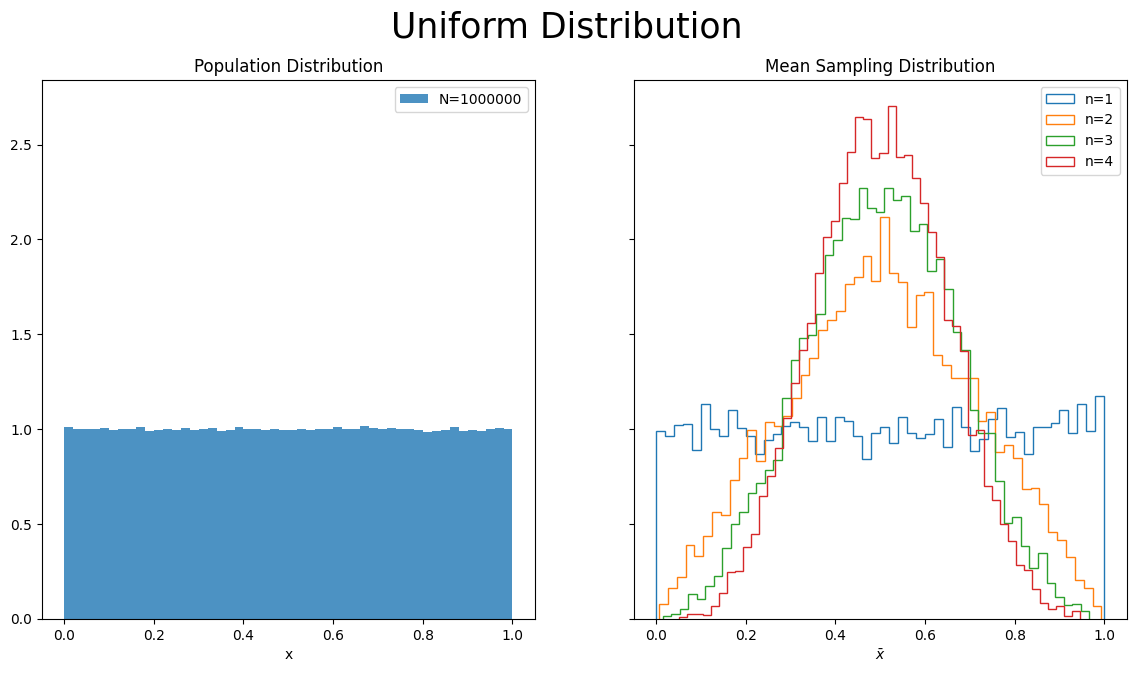

In [ ]:
CLT_Demonstrator(1000000, 
                 np.random.uniform(size=1000000), 
                 [1,2,3,4], 
                 dist_title='Uniform Distribution')

### Binomial Distribution

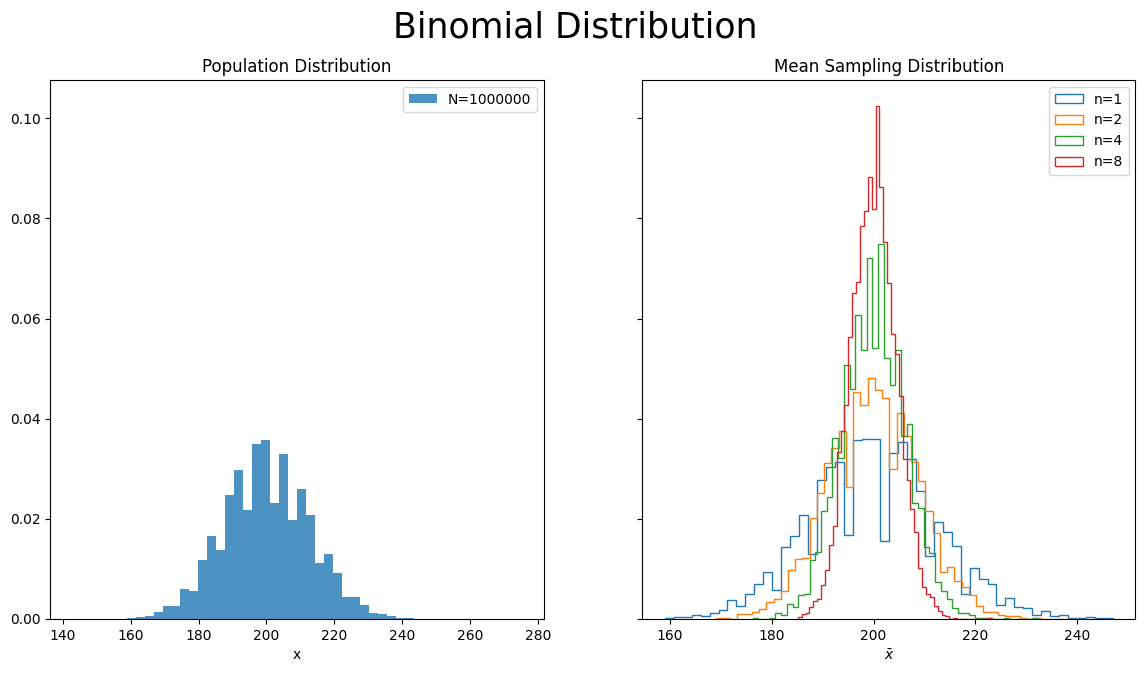

In [ ]:
CLT_Demonstrator(1000000, 
                 np.random.binomial(1000,0.2, size=1000000), 
                 [1,2,4,8], 
                 dist_title='Binomial Distribution')

### Poisson Distribution

In [ ]:
np.random.poisson(mu, 1000)

CLT_Demonstrator(1000000, 
                 np.random.poisson(15, 1000000), 
                 [1,2,4,8], 
                 dist_title='Poisson Distribution')

NameError: ignored

### Exponential Distribution

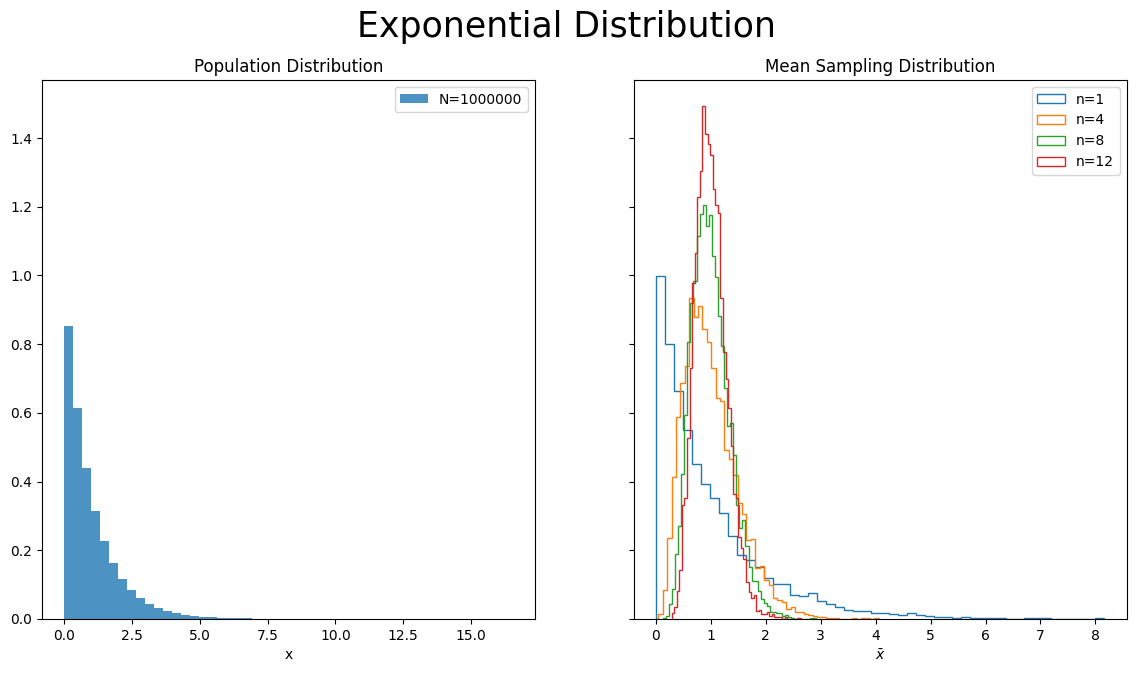

In [ ]:
CLT_Demonstrator(1000000, 
                 np.random.exponential(size=1000000), 
                 [1,4,8,12], 
                 dist_title='Exponential Distribution')

## Sample exercises

1. The Maxwell-Boltzmann distribution describes the speed of ideal gases inside a stationary container. It has a form of:

$$ f(x) = \frac{1}{a^3}\sqrt{\frac{2}{\pi}} x^2 \exp\left(-\frac{x^2}{2a^2}\right) $$


  a. Try to show the distribution converging using N = 10, 100, and 1000 samples.

  b. Get the mean and standard deviation of the distribution. 

2. Suppose there are 10 tulips and 8 roses in a bouquet. If I pick 5 flowers, what is the probability that I pick 2 tulips?   

Hint: Use the hypergeometric distribution which is given by

$$ P(X=x) = \frac{nCx \cdot (N-n)C(k-x)}{NCk} $$ 
 

### End of tutorial.

---